# Exploratory Data Analysis on World Suicide Rates from 1985 to 2016

## Resources and Information Used

* [Dataset](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)
* [Cleaning and Prepping Data with Python for Data Science](https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3)
* [Detailed Exploratory Data Analysis with Python ](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)
* [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* [Exploratory Data Analyis(EDA) and Data Visualization](https://kite.com/blog/python/data-analysis-visualization-python/)
* [Binning Data](https://www.physicsforums.com/threads/binning-data.933653/)
* [Handling Categorical Data in Python](https://www.datacamp.com/community/tutorials/categorical-data)
* [Data Visualization Using Seaborn](https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850)

The purpose of this project is to aid in suicide prevention by looking for useful patterns/correlations amongst different demographics worldwide as it relates to suicide rates.

In [59]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Inspecting/Cleaning the data 

In [2]:
#insert the data into a pandas dataframe
df = pd.read_csv('master.csv')
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
#check column names
col_names = df.columns
print(col_names)

#get datatypes for each column
df.info()

Index([u'country', u'year', u'sex', u'age', u'suicides_no', u'population',
       u'suicides/100k pop', u'country-year', u'HDI for year',
       u' gdp_for_year ($) ', u'gdp_per_capita ($)', u'generation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
#renaming these columns so they're easier to use
df=df.rename(columns = {' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita'})

In [5]:
#need to get rid of columns with too many NaN values
del df["HDI for year"]
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,"2,156,624,900",796,Generation X


In [6]:
df.describe(include="all")

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,2321,NaN,6
top,Austria,NaN,female,75+ years,NaN,NaN,NaN,Uzbekistan2004,"540,874,934",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,NaN,24874.000000,NaN


### Exploring Numerical Data Distribution

In [7]:
#numerical data is separated into it's own dataframe
num_df = df.select_dtypes(include = ['float64', 'int64'])
del num_df['year']
num_df.head()

,suicides_no,population,suicides/100k pop,gdp_per_capita
0,21,312900,6.71,796
1,16,308000,5.19,796
2,14,289700,4.83,796
3,1,21800,4.59,796
4,9,274300,3.28,796


#### Histograms for all the columns with numerical values

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



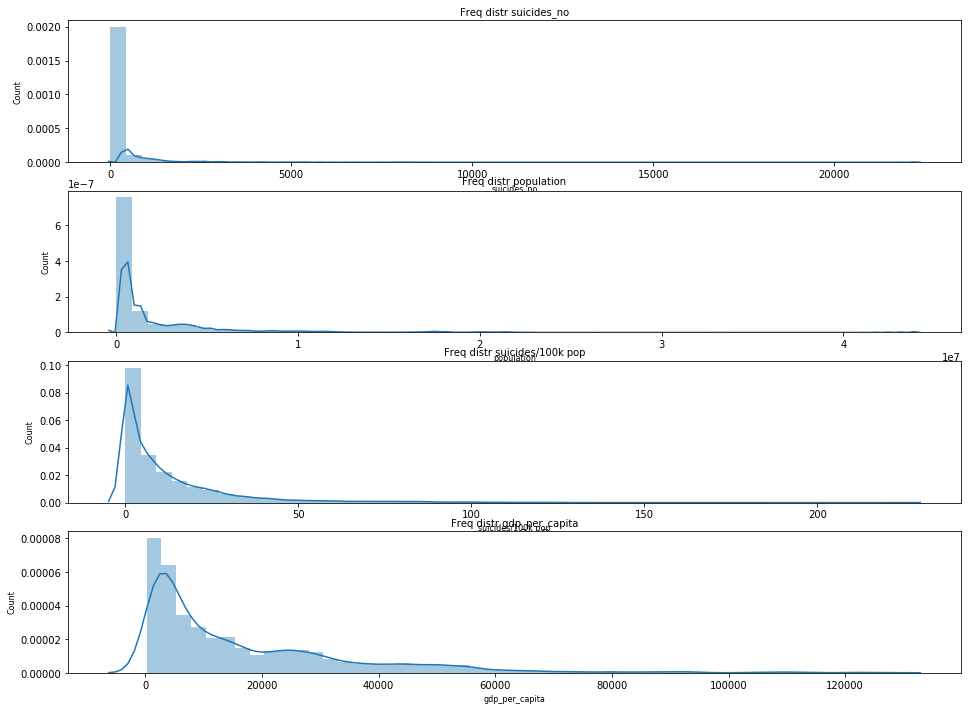

In [8]:
#distribution plot using seaborn library
colu_names = num_df.columns
fig, ax = plt.subplots(len(colu_names), figsize=(16,12))

#looping through the columns and creating a distribution plot for each one
for i, colu_val in enumerate(colu_names):
    sns.distplot(num_df[colu_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq distr '+colu_val, fontsize=10)
    ax[i].set_xlabel(colu_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18a71a10>,
      dtype=object)

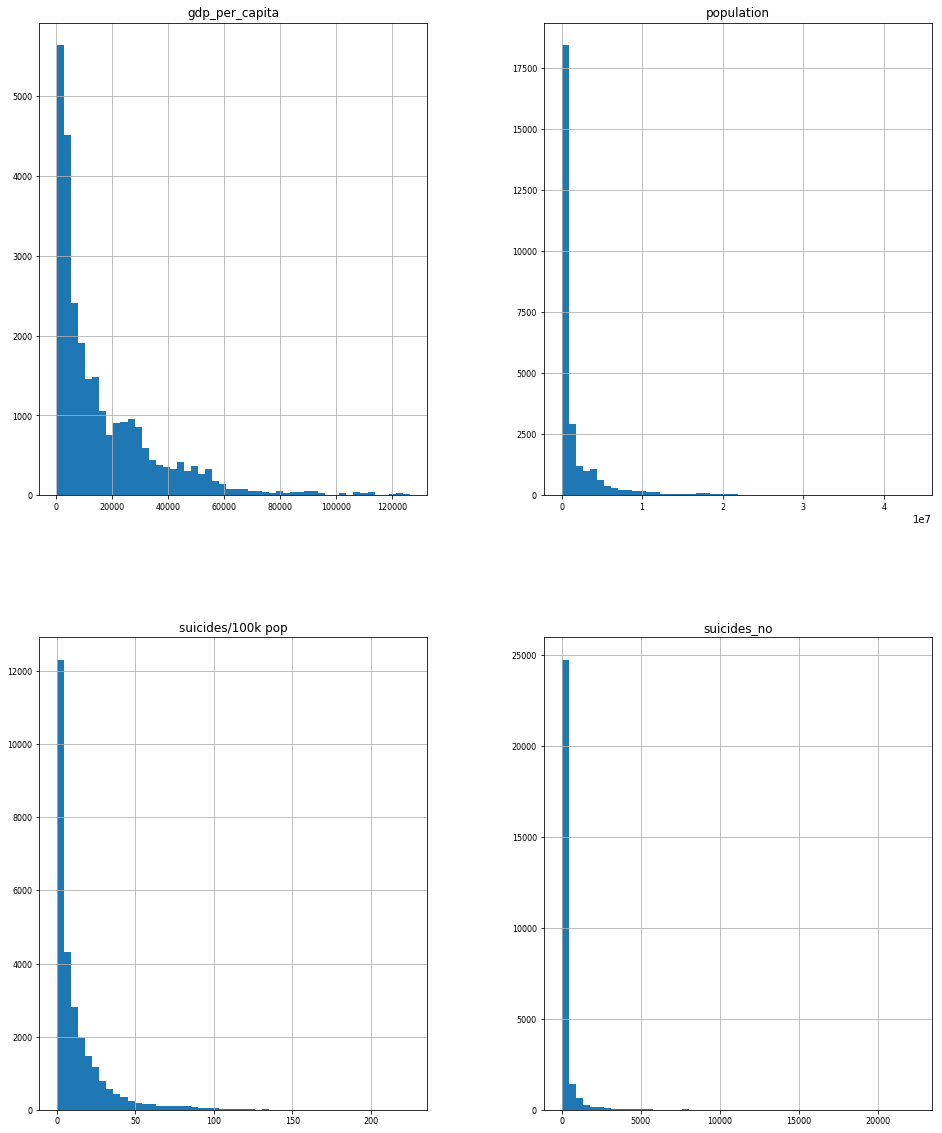

In [9]:
num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

**Note**: All the values of each column are skewed to the left with a similar distribution probably due to outliers.

#### Pair Plots & Correlation Matrix to look for correlation between variables, if any

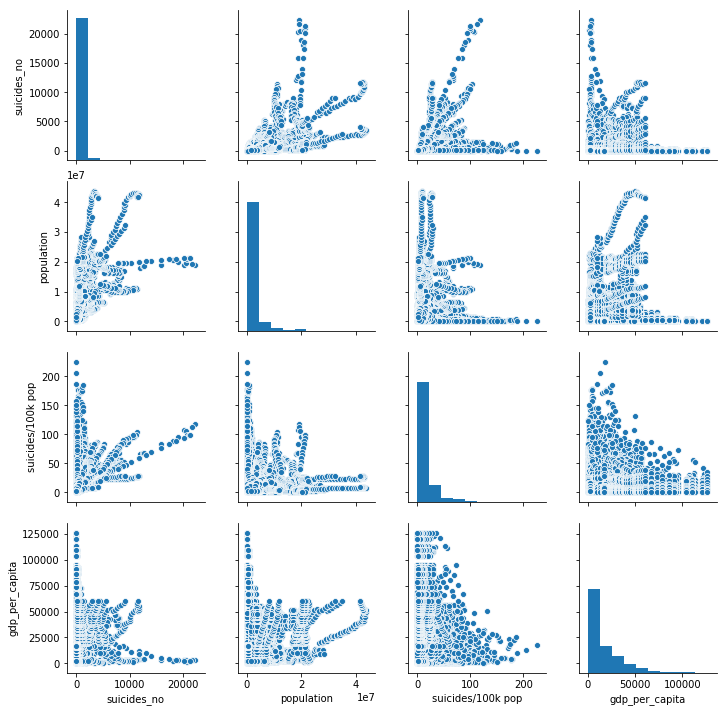

In [10]:
sns.pairplot(num_df, diag_kind="hist")

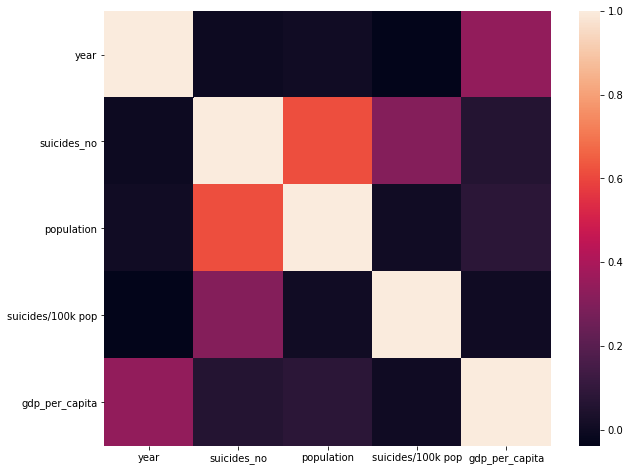

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Note**: Based upon these visualizations, I see little to no correlation between the numerical values in our data except the number of suicides and population size.

#### Outlier Analysis

In [12]:
import scipy.stats

def find_remove_outlier_iqr(data_sample):
    q1 = np.percentile(data_sample, 25)
    q3 = np.percentile(data_sample, 75)
    
    iqr = q3 - q1
    
    cutoff = iqr * 1.5
    
    lower, upper = q1-cutoff, q3+cutoff
    
    outliers =[]
    outliers_removed = []
    for x in data_sample:
        if x < lower or x > upper:
            outliers.append(x)
        if x > lower and x < upper:
            outliers_removed.append(x)
    return outliers

In [13]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

outliers = find_remove_outlier_iqr(df["suicides_no"])

out_df = df[df["suicides_no"].isin(outliers)]
out_df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,"88,416,668,900",3264,Silent
601,Argentina,1986,male,55-74 years,530,2008300,26.39,Argentina1986,"110,934,442,763",4072,G.I. Generation
602,Argentina,1986,male,35-54 years,478,3365200,14.20,Argentina1986,"110,934,442,763",4072,Silent
613,Argentina,1987,male,55-74 years,532,2034500,26.15,Argentina1987,"111,106,191,358",4026,G.I. Generation
614,Argentina,1987,male,35-54 years,482,3409100,14.14,Argentina1987,"111,106,191,358",4026,Silent
625,Argentina,1988,male,55-74 years,550,2079000,26.46,Argentina1988,"126,206,817,196",4458,G.I. Generation
626,Argentina,1988,male,35-54 years,477,3503000,13.62,Argentina1988,"126,206,817,196",4458,Silent
637,Argentina,1989,male,55-74 years,548,2105000,26.03,Argentina1989,"76,636,898,036",2670,G.I. Generation
638,Argentina,1989,male,35-54 years,462,3561000,12.97,Argentina1989,"76,636,898,036",2670,Silent


In [14]:
out_df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita
count,3909.000000,3909.000000,3.909000e+03,3909.000000,3909.000000
mean,2000.955743,1430.363520,7.205532e+06,27.501965,19503.661039
std,8.486900,2029.729897,7.092652e+06,24.036612,16179.294534
min,1985.000000,324.000000,1.882350e+05,1.980000,428.000000
25%,1994.000000,471.000000,2.279600e+06,10.840000,4104.000000
50%,2001.000000,743.000000,4.868128e+06,19.730000,15522.000000
75%,2008.000000,1375.000000,9.334127e+06,36.530000,30375.000000
max,2016.000000,22338.000000,4.380521e+07,185.370000,72856.000000


In [15]:
num_df2 = out_df.select_dtypes(include = ['float64', 'int64'])
del num_df2['year']

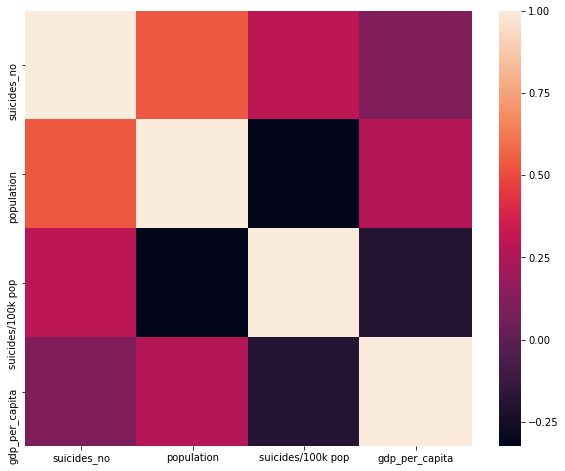

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = num_df2.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

When I observe the outliers only *(which, in this case, are countries with exceptionally high suicide rates)*, the results are the same.

*Next, I want to categorize the number of suicides into bins of high, medium, or low suicide rates.*

In [17]:
#creating a dataframe without the outliers
no_out_df = df[~df["suicides_no"].isin(outliers)]
no_out_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [18]:
group_names = np.array(['low', 'medium', 'high']) 
bins = np.linspace(no_out_df['suicides_no'].min(),no_out_df['suicides_no'].max(), 4) 
no_out_df['suicides_binned'] = pd.cut(no_out_df['suicides_no'], bins, labels = group_names, include_lowest = True)

no_out_df.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation,suicides_binned
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,low
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,low
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,low
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,low
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,low


In [19]:
num_df3 = no_out_df.select_dtypes(include = ['float64', 'int64'])
del num_df3['year']

Is there correlation without the outliers? *No*

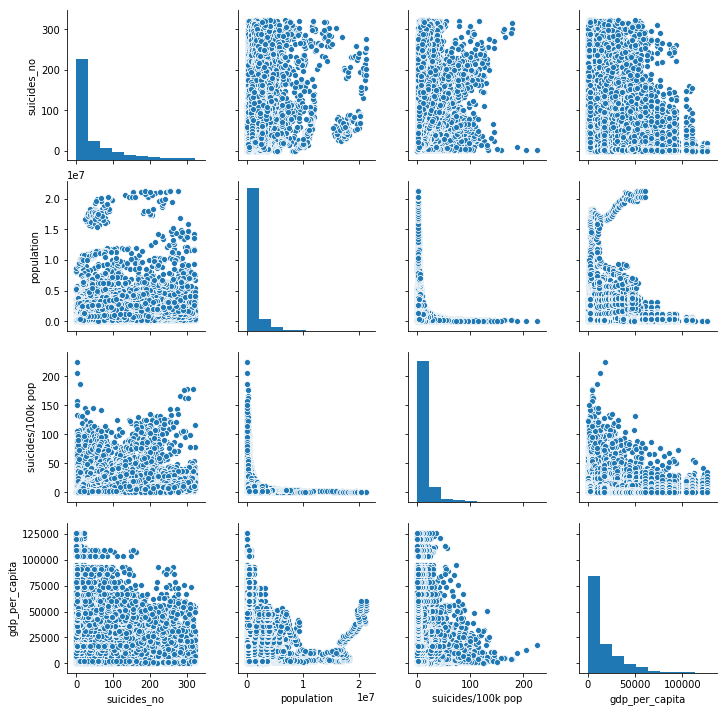

In [20]:
sns.pairplot(num_df3, diag_kind="hist")

Visualizing the number of suicides by year, it looks like the number of suicides is at its high around 2015 and at its lowest in 1985 and 2005.

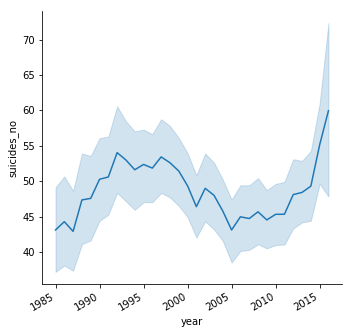

In [21]:
yr = sns.relplot(x="year", y="suicides_no", kind="line", data=no_out_df)
yr.fig.autofmt_xdate()


### Categorical Data Analysis

In [22]:
suicide_gen_df2 = pd.crosstab(no_out_df["suicides_binned"], no_out_df["generation"])

suicide_gen_df2

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
suicides_binned,,,,,,
low,2884,2008,4539,1445,4949,4247
medium,602,302,622,21,325,748
high,332,104,292,4,128,359


This chart shows the suicide rate amongst different generations and whether they fall into the low, medium, or high category. **It looks like Gen Z has the lowest rate of suicides.**

**Boomers and the Silent Gen have the highest suicide rates amongst the different generations.**

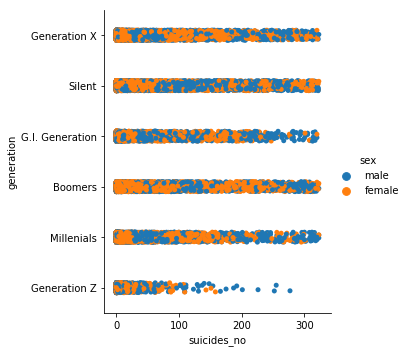

In [24]:
sns.catplot(x="suicides_no",y="generation",hue="sex",data=no_out_df)

This visualization above shows the number of suicides for different generations by whether the person is male or female.
Even though suicide rates among Gen Z are low for the most part, **the higher numbers reported for Gen Z consists of more males than females.**

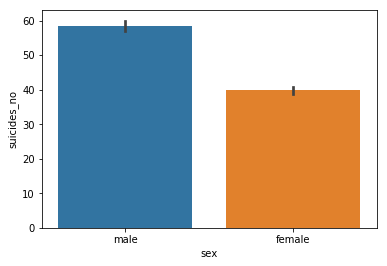

In [28]:
sns.barplot(x='sex',y='suicides_no',data=no_out_df)

There appears to be a **higher rate of reported suicides amongst men than women** in general around the world.

In [30]:
suicide_age_df2 = pd.crosstab(no_out_df["suicides_binned"], no_out_df["age"])

suicide_age_df2

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
suicides_binned,,,,,,
low,3367,3259,2534,4543,2793,3576
medium,469,443,605,39,561,503
high,192,217,290,19,376,125


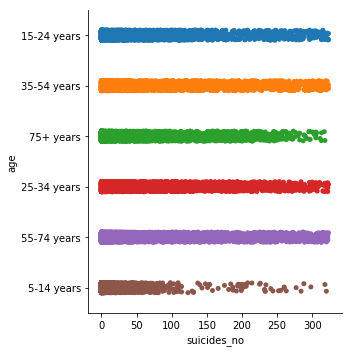

In [29]:
sns.catplot(x="suicides_no",y="age",data=no_out_df)

There is a **higher number of reported suicides amongst the 35-54 year olds and 55-75 year olds** than any other age group.

Geographical Visualization of Reported Suicide Numbers